# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Prathamesh\Downloads\Projects\British Airways Job Simulation\customer_booking.csv", encoding='ISO-8859-1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 5.3+ 

In [9]:
df.nunique()

num_passengers             9
sales_channel              2
trip_type                  3
purchase_lead            470
length_of_stay           335
flight_hour               24
flight_day                 7
route                    799
booking_origin           104
wants_extra_baggage        2
wants_preferred_seat       2
wants_in_flight_meals      2
flight_duration           21
booking_complete           2
dtype: int64

In [10]:
df.shape

(50000, 14)

## EDA

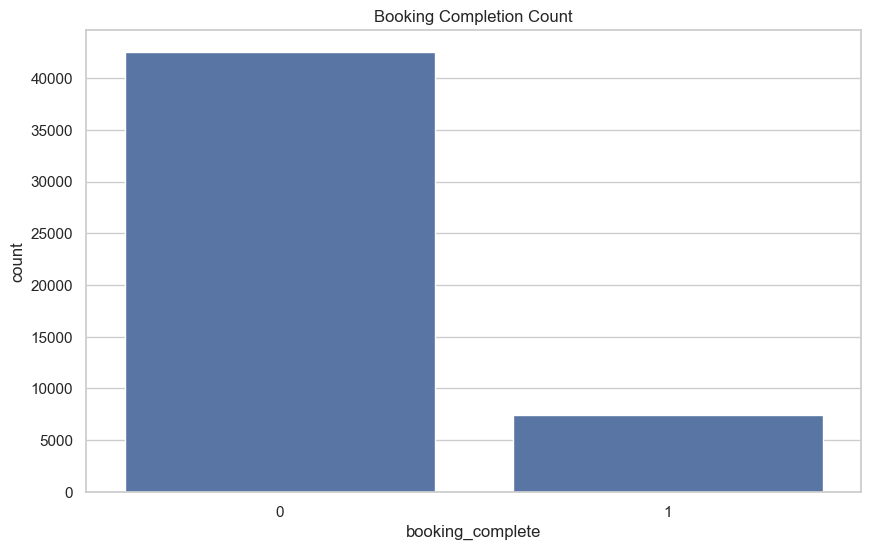

In [11]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Target variable count
sns.countplot(x='booking_complete', data=df)
plt.title("Booking Completion Count")
plt.show()

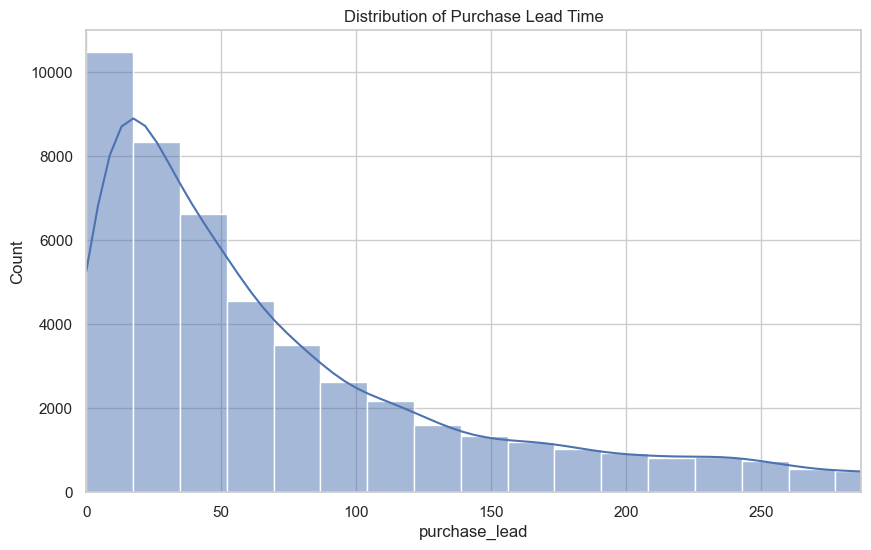

In [12]:
# Distribution: Purchase lead time
sns.histplot(df['purchase_lead'], bins=50, kde=True)
plt.title("Distribution of Purchase Lead Time")
plt.xlim(0, df['purchase_lead'].quantile(0.95))  # clip outliers
plt.show()

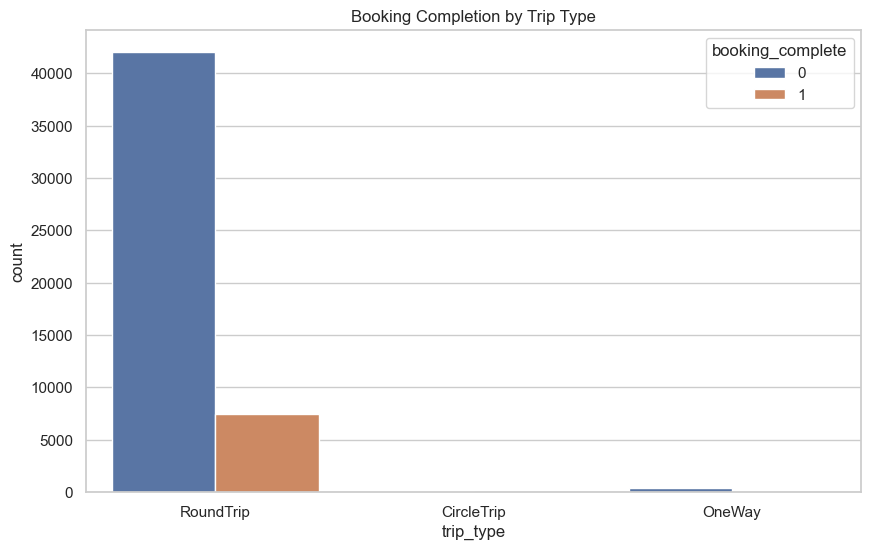

In [13]:
# Booking complete vs Trip Type
sns.countplot(x='trip_type', hue='booking_complete', data=df)
plt.title("Booking Completion by Trip Type")
plt.show()

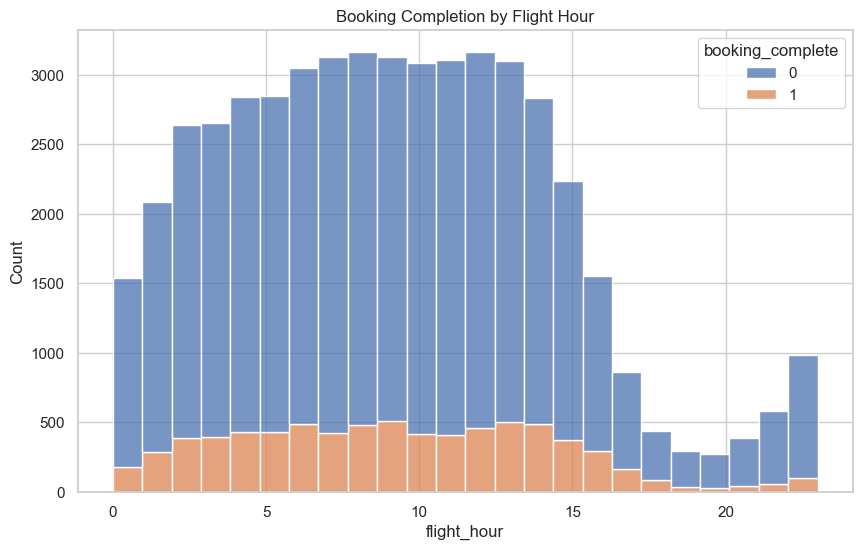

In [14]:
# Booking complete vs Flight Hour
sns.histplot(data=df, x='flight_hour', hue='booking_complete', multiple='stack', bins=24)
plt.title("Booking Completion by Flight Hour")
plt.show()

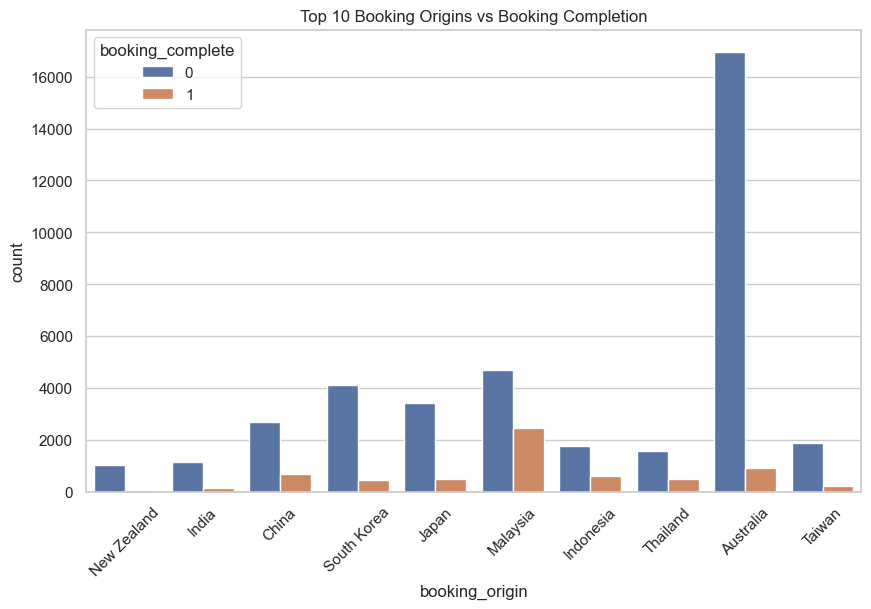

In [15]:
# Booking origin vs completion (Top 10 countries)
top_origins = df['booking_origin'].value_counts().nlargest(10).index
sns.countplot(data=df[df['booking_origin'].isin(top_origins)],
              x='booking_origin', hue='booking_complete')
plt.title("Top 10 Booking Origins vs Booking Completion")
plt.xticks(rotation=45)
plt.show()

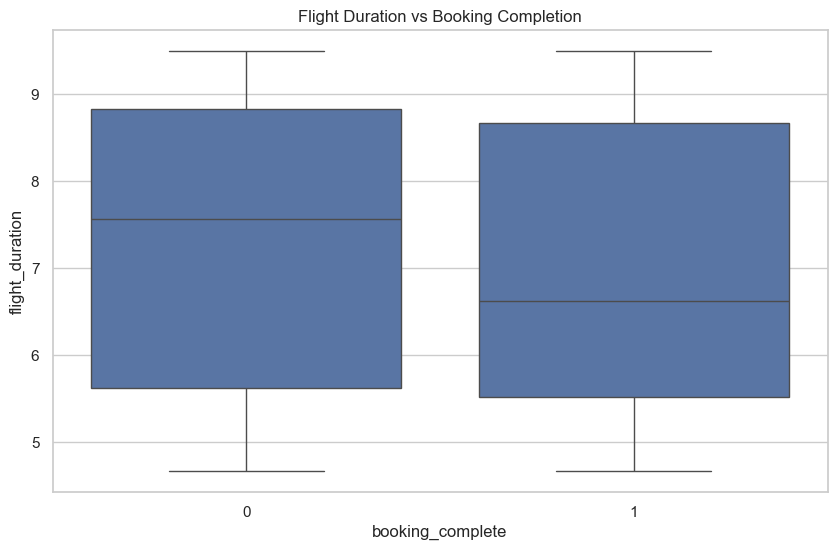

In [16]:
# Flight duration vs completion
sns.boxplot(x='booking_complete', y='flight_duration', data=df)
plt.title("Flight Duration vs Booking Completion")
plt.show()

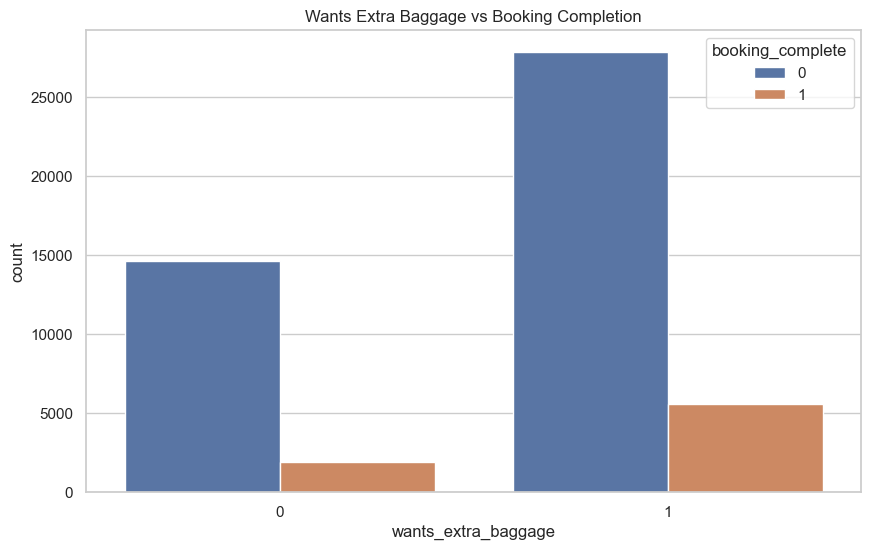

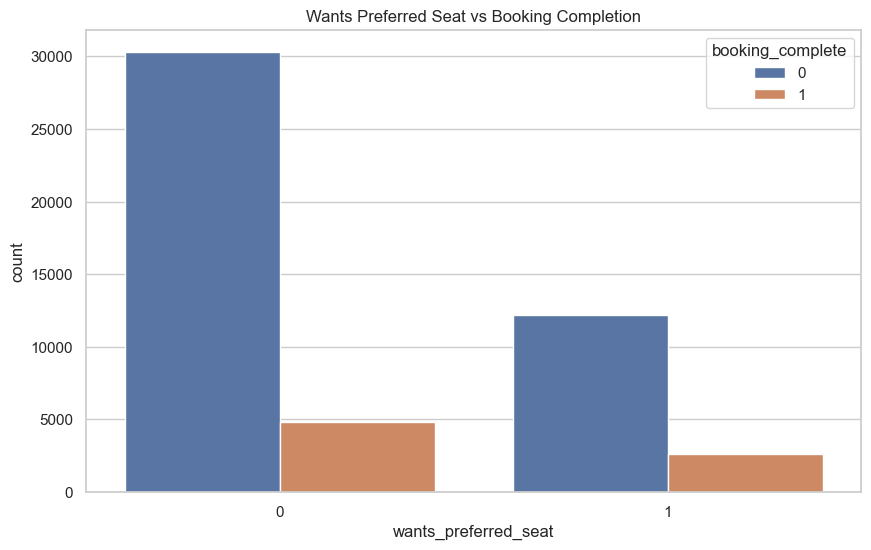

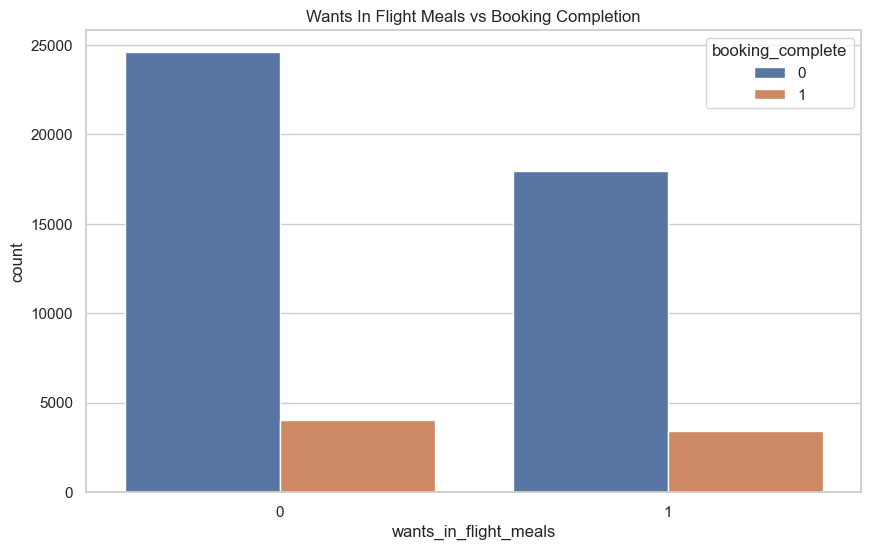

In [17]:
# Wants services vs booking complete
for col in ['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']:
    sns.countplot(x=col, hue='booking_complete', data=df)
    plt.title(f"{col.replace('_', ' ').title()} vs Booking Completion")
    plt.show()

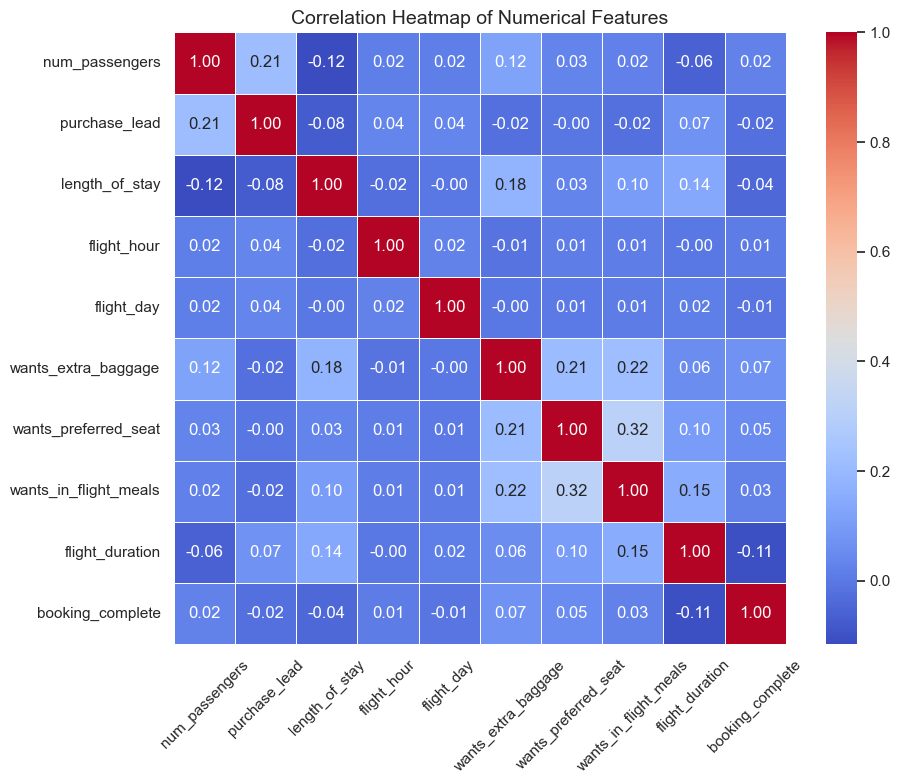

In [18]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr = numerical_cols.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Feature Eng. and Preprocessing

In [19]:
df['add_on_score'] = df[['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']].sum(axis=1)

In [20]:
def bucket_hour(hour):
    if 5 <= hour <= 11:
        return 'morning'
    elif 12 <= hour <= 17:
        return 'afternoon'
    elif 18 <= hour <= 22:
        return 'evening'
    else:
        return 'night'

df['flight_time_category'] = df['flight_hour'].apply(bucket_hour)

In [21]:
df['is_weekend'] = df['flight_day'].isin(['Saturday', 'Sunday']).astype(int)

In [22]:
df['booking_urgency'] = pd.cut(df['purchase_lead'], bins=[-1, 3, 7, 14, 30, 1000], labels=['last_minute', 'urgent', 'short_term', 'mid_term', 'early'])

In [23]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete',
       'add_on_score', 'flight_time_category', 'is_weekend',
       'booking_urgency'],
      dtype='object')

In [24]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Initialize the encoder
ohe = OneHotEncoder(drop='first', sparse_output=False)  # Updated argument 'sparse_output'
le = LabelEncoder()

# Categorical columns to be one-hot encoded
one_hot_columns = ['sales_channel', 'trip_type', 'flight_time_category', 'booking_urgency']

# Label encoding for 'route' and 'booking_origin'
label_encode_columns = ['route', 'booking_origin']

# Apply encoding to categorical variables
df_encoded = df.copy()

# One-hot encode the categorical features
df_one_hot = pd.DataFrame(ohe.fit_transform(df_encoded[one_hot_columns]), columns=ohe.get_feature_names_out(one_hot_columns))

# Label encode 'route' and 'booking_origin'
for col in label_encode_columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Drop the original categorical columns and concatenate the new one-hot encoded columns
df_encoded = df_encoded.drop(one_hot_columns, axis=1)
df_encoded = pd.concat([df_encoded, df_one_hot], axis=1)

# Let's check if the encoding looks good
print(df_encoded.head())

   num_passengers  purchase_lead  length_of_stay  flight_hour  flight_day  \
0               2            262              19            7           6   
1               1            112              20            3           6   
2               2            243              22           17           3   
3               1             96              31            4           6   
4               2             68              22           15           3   

   route  booking_origin  wants_extra_baggage  wants_preferred_seat  \
0      0              61                    1                     0   
1      0              61                    0                     0   
2      0              36                    1                     1   
3      0              61                    0                     0   
4      0              36                    1                     0   

   wants_in_flight_meals  ...  sales_channel_Mobile  trip_type_OneWay  \
0                      0  ...        

In [25]:
# Separate classes
class_0 = df_encoded[df_encoded['booking_complete'] == 0]
class_1 = df_encoded[df_encoded['booking_complete'] == 1]

# Undersample class 0
class_0_under = class_0.sample(n=len(class_1), random_state=42)

# Combine to form a balanced dataset
df_balanced = pd.concat([class_0_under, class_1], axis=0)

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [26]:
df_balanced.shape

(14956, 24)

In [27]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Identify numeric features (already encoded)
numeric_features = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_day', 
                    'flight_hour', 'flight_duration','booking_origin','add_on_score']

# Make a copy for scaled version
df_scaled = df_balanced.copy()

scaler = StandardScaler()
df_scaled[numeric_features] = scaler.fit_transform(df_scaled[numeric_features])

In [28]:
from sklearn.model_selection import train_test_split

X = df_balanced.drop(['booking_complete', 'flight_day', 'route', 'wants_extra_baggage', 
                     'wants_preferred_seat', 'wants_in_flight_meals','flight_hour'], axis=1)  # For Random Forest
X_scaled = df_scaled.drop(['booking_complete', 'flight_day', 'route', 'wants_extra_baggage', 
                     'wants_preferred_seat', 'wants_in_flight_meals','flight_hour'], axis=1)  # For Logistic Regression
y = df_balanced['booking_complete']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2,  stratify=y, random_state=42)

In [29]:
y.value_counts()

booking_complete
0    7478
1    7478
Name: count, dtype: int64

## Training Models

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Random Forest (no scaling needed)
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# Logistic Regression (use scaled)
lr = LogisticRegression(class_weight='balanced', max_iter=1000)
lr.fit(X_train_scaled, y_train_scaled)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred_lr = lr.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test)

In [32]:
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.61      0.61      0.61      1496
           1       0.61      0.60      0.61      1496

    accuracy                           0.61      2992
   macro avg       0.61      0.61      0.61      2992
weighted avg       0.61      0.61      0.61      2992

Random Forest Report:
               precision    recall  f1-score   support

           0       0.68      0.65      0.67      1496
           1       0.67      0.70      0.68      1496

    accuracy                           0.67      2992
   macro avg       0.67      0.67      0.67      2992
weighted avg       0.67      0.67      0.67      2992



In [33]:
print("ROC-AUC (LR):", roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:,1]))
print("ROC-AUC (RF):", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

ROC-AUC (LR): 0.6487813313220281
ROC-AUC (RF): 0.7341174057736852


In [35]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, 
                                   n_iter=50, cv=5, scoring='f1', n_jobs=-1, verbose=2)
random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [36]:
best_rf

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=500, random_state=42)

In [37]:
rf = RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=500, random_state=42)

In [38]:
y_pred_rf = rf.predict(X_test)

In [39]:
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Report:
               precision    recall  f1-score   support

           0       0.73      0.63      0.67      1496
           1       0.67      0.76      0.71      1496

    accuracy                           0.69      2992
   macro avg       0.70      0.69      0.69      2992
weighted avg       0.70      0.69      0.69      2992



In [40]:
print("ROC-AUC (RF):", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

ROC-AUC (RF): 0.752715351454145


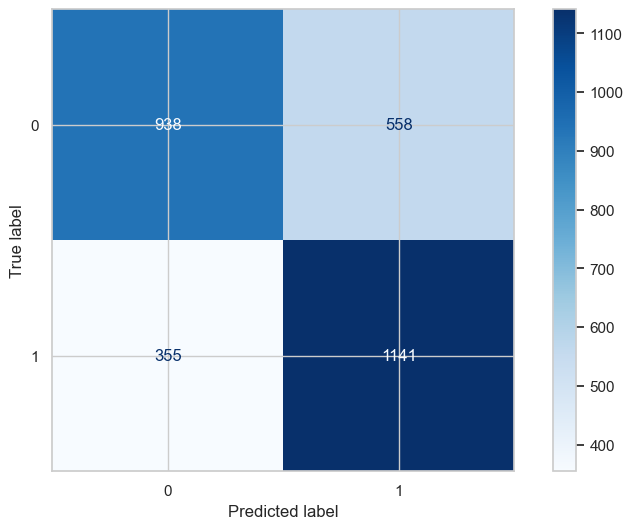

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_rf = best_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot(cmap='Blues')

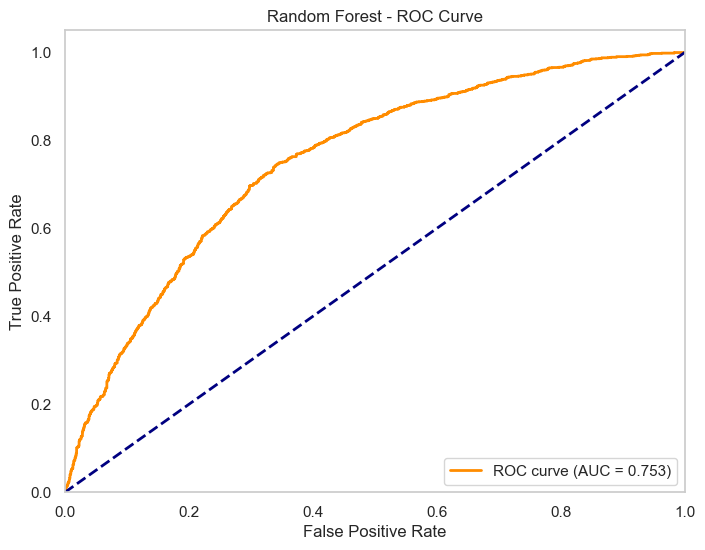

In [44]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()